# News Title Classification

### Variables:
- df: Dataframe from "News Title.xls"
- X: "News Title" feature from Dataframe
- y: "Category" feature from Dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_excel('News Title.xls')
df.head()

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   No          65535 non-null  int64 
 1   News Title  65535 non-null  object
 2   Category    65535 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


# Exploratory Data Analysis (EDA)

In [4]:
# total count for each categories
df['Category'].value_counts()

Entertainment    23961
Business         17707
Technology       16776
Medical           7091
Name: Category, dtype: int64

In [5]:
# total count for each News Title
df['News Title'].value_counts()

The article requested cannot be found! Please refresh your browser or go back  ...    21
Posted by Shoaib-ur-Rehman Siddiqui                                                   11
Posted by Imaduddin                                                                   11
Business Highlights                                                                   10
Posted by Parvez Jabri                                                                10
                                                                                      ..
After a Harsh Winter More Americans to Start Summer Travel Season with a  ...          1
NASHVILLE's Hayden Panettiere Expecting First Child                                    1
Father's touching photo request sparks action on social media                          1
Google Wants You to Text While Driving                                                 1
Google to Launch “Google Fit” at I/O, Will Announce Wearable Partners Too              1
Name: News Title, Len

# Data Cleansing

I removed the title for contains:
- "The article requested cannot be found! Please refresh your browser or go back"
- "Posted by"
- "Posted on"
- "click the phrases to see a list"

I removed this field because there was no hint of the news title at all.

In [6]:
# check the field which will be removed
df[df['News Title'].str.contains("The article requested cannot be found! Please refresh your browser or go back")]

,No,News Title,Category
989,990,The article requested cannot be found! Please ...,Entertainment
4320,4321,The article requested cannot be found! Please ...,Entertainment
4425,4426,The article requested cannot be found! Please ...,Entertainment
5099,5100,The article requested cannot be found! Please ...,Entertainment
5249,5250,The article requested cannot be found! Please ...,Entertainment
9011,9012,The article requested cannot be found! Please ...,Entertainment
12375,12376,The article requested cannot be found! Please ...,Entertainment
13255,13256,The article requested cannot be found! Please ...,Entertainment
15279,15280,The article requested cannot be found! Please ...,Entertainment
17182,17183,The article requested cannot be found! Please ...,Entertainment


In [7]:
# print the index of the field which will be removed
print(list(df[df['News Title'].str.contains("The article requested cannot be found! Please refresh your browser or go back")].index))

[989, 4320, 4425, 5099, 5249, 9011, 12375, 13255, 15279, 17182, 19623, 21092, 32175, 35223, 36342, 37627, 39358, 42095, 57244, 59069, 62123]


In [8]:
# remove the field that have no hint for news title
df.drop([989, 4320, 4425, 5099, 5249, 9011, 12375, 13255, 15279, 17182, 19623, 21092, 32175, 35223, 36342, 37627,
         39358, 42095,57244, 59069, 62123], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business
...,...,...,...
65509,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology
65510,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology
65511,65533,Watch first 'Ninja Turtles' trailer,Entertainment
65512,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment


In [9]:
# check the field which will be removed
df[df['News Title'].str.contains("Posted by")]

,No,News Title,Category
3331,3333,Posted by Parvez Jabri,Business
4149,4151,Posted by Parvez Jabri,Business
4670,4674,Posted by Shoaib-ur-Rehman Siddiqui,Business
5616,5622,Posted by Shoaib-ur-Rehman Siddiqui,Technology
8340,8346,Posted by Imaduddin,Entertainment
8794,8800,Posted by Shoaib-ur-Rehman Siddiqui,Business
9354,9361,Posted by Parvez Jabri,Business
9867,9874,Posted by Shoaib-ur-Rehman Siddiqui,Business
11408,11415,Posted by Muhammad Iqbal,Business
14863,14872,Posted by Imaduddin,Business


In [10]:
# print the index of the field which will be removed
print(list(df[df['News Title'].str.contains("Posted by")].index))

[3331, 4149, 4670, 5616, 8340, 8794, 9354, 9867, 11408, 14863, 15048, 18976, 19453, 20778, 20964, 22178, 22758, 24646, 29912, 30688, 41428, 41447, 41822, 41893, 42140, 42706, 45315, 49664, 50031, 50863, 53147, 53365, 56574, 56615, 58122, 58914, 60658, 64405, 65086]


In [11]:
# remove the field that have no hint for news title
df.drop([3331, 4149, 4670, 5616, 8340, 8794, 9354, 9867, 11408, 14863, 15048, 18976, 19453, 20778, 20964, 22178, 22758, 24646, 
         29912, 30688, 41428, 41447, 41822, 41893, 42140, 42706, 45315, 49664, 50031, 50863, 53147, 53365, 56574, 56615, 58122, 
         58914, 60658, 64405, 65086], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business
...,...,...,...
65470,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology
65471,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology
65472,65533,Watch first 'Ninja Turtles' trailer,Entertainment
65473,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment


In [12]:
# check the field which will be removed
df[df['News Title'].str.contains("Posted on")]

,No,News Title,Category
42472,42516,"Posted on April 14th, 2014 at 5:58 am",Entertainment
53782,53833,Posted on 29th June 2014,Entertainment


In [13]:
# print the index of the field which will be removed
print(list(df[df['News Title'].str.contains("Posted on")].index))

[42472, 53782]


In [14]:
# remove the field that have no hint for news title
df.drop([42472, 53782], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business
...,...,...,...
65468,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology
65469,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology
65470,65533,Watch first 'Ninja Turtles' trailer,Entertainment
65471,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment


In [15]:
# check total count for each News Title so we will know in case there is a weird news title
df['News Title'].value_counts()

Business Highlights                                                              10
What you need to know before markets open                                         7
(click the phrases to see a list)                                                 7
Business Wire                                                                     7
10 Things to Know for Today                                                       6
                                                                                 ..
'Jem and the Holograms'...                                                        1
After a Harsh Winter More Americans to Start Summer Travel Season with a  ...     1
NASHVILLE's Hayden Panettiere Expecting First Child                               1
Father's touching photo request sparks action on social media                     1
Google to Launch “Google Fit” at I/O, Will Announce Wearable Partners Too         1
Name: News Title, Length: 64973, dtype: int64

wow, there is a weird news title. That is "(click the phrases to see a list)"

In [16]:
# check the field which will be removed
df[df['News Title'].str.contains("click the phrases to see a list")]

,No,News Title,Category
966,967,(click the phrases to see a list),Business
19248,19271,(click the phrases to see a list),Entertainment
25925,25956,(click the phrases to see a list),Entertainment
30730,30763,(click the phrases to see a list),Medical
39802,39840,(click the phrases to see a list),Medical
52982,53032,(click the phrases to see a list),Technology
54918,54971,(click the phrases to see a list),Business


In [17]:
# print the index of the field which will be removed
print(list(df[df['News Title'].str.contains("click the phrases to see a list")].index))

[966, 19248, 25925, 30730, 39802, 52982, 54918]


In [18]:
# remove the field that have no hint for news title
df.drop([966, 19248, 25925, 30730, 39802, 52982, 54918], inplace=True)
df.reset_index(drop=True, inplace=True)
df

,No,News Title,Category
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,2,Dov Charney's Redeeming Quality,Business
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,4,"Google shows off Androids for wearables, cars,...",Technology
4,5,China May new bank loans at 870.8 bln yuan,Business
...,...,...,...
65461,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology
65462,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology
65463,65533,Watch first 'Ninja Turtles' trailer,Entertainment
65464,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment


In [19]:
# check total count for each News Title so we will know in case there is a weird news title
df['News Title'].value_counts()

Business Highlights                                                              10
What you need to know before markets open                                         7
Business Wire                                                                     7
PR Newswire                                                                       6
10 Things to Know for Today                                                       6
                                                                                 ..
New alleged Banksy piece takes swipe at government phone surveillance             1
'Jem and the Holograms'...                                                        1
After a Harsh Winter More Americans to Start Summer Travel Season with a  ...     1
NASHVILLE's Hayden Panettiere Expecting First Child                               1
Google to Launch “Google Fit” at I/O, Will Announce Wearable Partners Too         1
Name: News Title, Length: 64972, dtype: int64

# Feature Engineering

In [20]:
# add feature for length for each title
df['title_len'] = df['News Title'].apply(len)
df.head()

,No,News Title,Category,title_len
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology,58
1,2,Dov Charney's Redeeming Quality,Business,31
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment,48
3,4,"Google shows off Androids for wearables, cars,...",Technology,50
4,5,China May new bank loans at 870.8 bln yuan,Business,42


Text(0.5,0,'Title Length')

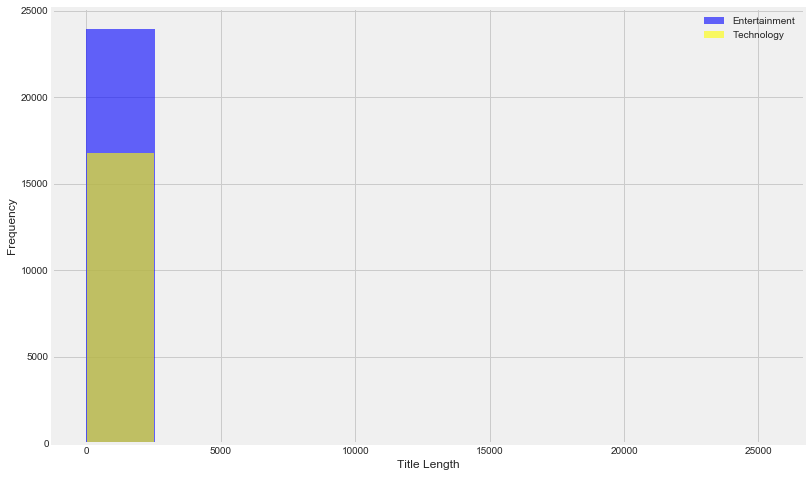

In [21]:
# histogram for title_len for category: Entertainment and category: Technology
plt.figure(figsize=(12, 8))

df[df['Category']=='Entertainment']['title_len'].plot(kind='hist', color='blue', 
                                       label='Entertainment', alpha=0.6)
df[df['Category']=='Technology']['title_len'].plot(kind='hist', color='yellow', 
                                       label='Technology', alpha=0.6)

plt.legend()
plt.xlabel("Title Length")

This histogram is so weird, i will check soon

Text(0.5,0,'Title Length')

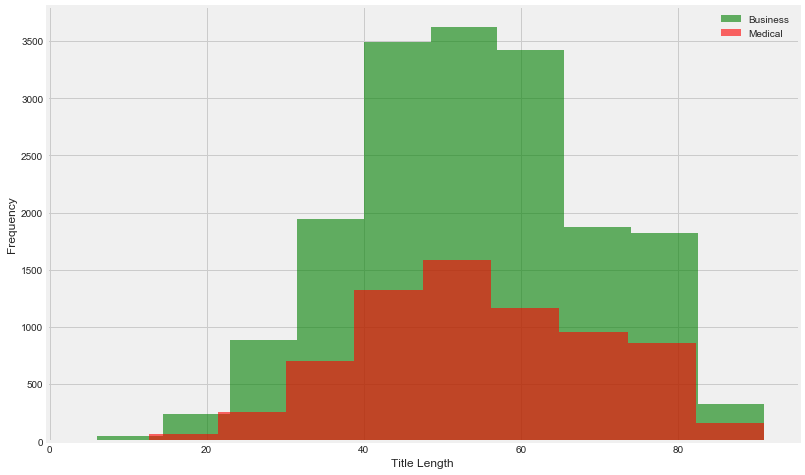

In [22]:
# histogram for title_len for category: Business and category: Medical
plt.figure(figsize=(12, 8))

df[df['Category']=='Business']['title_len'].plot(kind='hist', color='green', 
                                       label='Business', alpha=0.6)
df[df['Category']=='Medical']['title_len'].plot(kind='hist', color='red', 
                                       label='Medical', alpha=0.6)
plt.legend()
plt.xlabel("Title Length")

In [23]:
# calculate some statistical data for Entertainment Category
df[df['Category']=='Entertainment']['title_len'].describe()

count    23936.000000
mean        59.754804
std        164.820001
min          4.000000
25%         47.000000
50%         60.000000
75%         73.000000
max      25422.000000
Name: title_len, dtype: float64

In [24]:
# calculate some statistical data for Technology Category
df[df['Category']=='Technology']['title_len'].describe()

count    16772.000000
mean        57.655557
std        192.766039
min          7.000000
25%         45.000000
50%         56.000000
75%         68.000000
max      24945.000000
Name: title_len, dtype: float64

In [25]:
# calculate some statistical data for Business Category
df[df['Category']=='Business']['title_len'].describe()

count    17670.000000
mean        53.848387
std         14.971898
min          6.000000
25%         43.000000
50%         53.000000
75%         64.000000
max         91.000000
Name: title_len, dtype: float64

In [26]:
# calculate some statistical data for Medical Category
df[df['Category']=='Medical']['title_len'].describe()

count    7088.000000
mean       54.958663
std        15.132745
min         4.000000
25%        44.000000
50%        54.000000
75%        66.000000
max        91.000000
Name: title_len, dtype: float64

For both the Entertainment Category and the Technology Category, the maximum length does not make sense

In [27]:
# sort title_len
df.sort_values(by=['title_len'], ascending=False).head(10)

,No,News Title,Category,title_len
53107,53163,I never thought I'd be in love” says Angelina ...,Entertainment,25422
62785,62853,"A few years ago, scientists calculated that be...",Technology,24945
29126,29160,I don't know why I'm a sex symbol' says smould...,Entertainment,824
50496,50550,'Bachelorette' host 'fought like crazy' to fil...,Entertainment,91
10248,10264,"LG Electronics Inc.'s share price up, posts a ...",Technology,91
22414,22445,Flashy 'Draft Day' doesn't let football facts ...,Entertainment,91
12777,12795,"Movie review: 'Edge of Tomorrow' a fun, furiou...",Entertainment,91
62485,62553,Oscar Pistorius trial restart could be delayed...,Medical,91
64499,64568,Lions Gate to release 'Divergent' film finale ...,Entertainment,91
52075,52130,Straight talk for families on health care: The...,Business,91


In [28]:
# find title which have 25422 characters
df.iloc[53107,1]

"I never thought I'd be in love” says Angelina Jolie\thttp://www.shanghaidaily.com/article/article_xinhua.aspx\\?id=217113\tShanghai Daily \\(subscription\\)\te\tdSK9w1sX3_u4D4MgvroyRJ-CcxxAM\twww.shanghaidaily.com\t1399574518790\n195219\tAngelina Jolie: I never thought I'd be in love but Brad Pitt and I drive each other  ...\thttp://www.nowmagazine.co.uk/celebrity-news/552980/angelina-jolie-i-never-thought-i-d-be-in-love-but-brad-pitt-and-i-drive-each-other-beautifully-crazy\tNow Magazine Online\te\tdSK9w1sX3_u4D4MgvroyRJ-CcxxAM\twww.nowmagazine.co.uk\t1399574519022\n195220\tAngelina Jolie supports kidnapped Nigerian girls and reveals secrets about love  ...\thttp://www.standartnews.com/english/read/angelina_jolie_supports_kidnapped_nigerian_girls_and_reveals_secrets_about_love_with_brad_pitt-3582.html\tStandart News\te\tdSK9w1sX3_u4D4MgvroyRJ-CcxxAM\twww.standartnews.com\t1399574519245\n195221\tAngelina Jolie Reveals Working With Daughter Vivienne On Maleficent Was 'So  ...\thttp://w

In [29]:
# find title which have 24945 characters
df.iloc[62785,1]

'A few years ago, scientists calculated that benefit as having a net present value  ...\thttp://theenergycollective.com/josephromm/367921/climate-panel-stunner-avoiding-climate-catastrophe-super-cheap-only-if-we-act-now\tEnergy Collective\tt\tdPhzj-Zymt7_2fMuSkTFhziYo3U0M\ttheenergycollective.com\t1397513703600\n113084\tTime Is Running Out … and Five Other Takeaways From the UN\'s Global  ...\thttp://www.nationaljournal.com/energy/time-is-running-out-and-five-other-takeaways-from-the-u-n-s-global-warming-report-20140414\tNational Journal\tt\tdPhzj-Zymt7_2fMuSkTFhziYo3U0M\twww.nationaljournal.com\t1397513703854\n113085\tStep up action to curb global warming, or risks rise: UN\thttp://www.reuters.com/article/2014/04/13/us-climatechange-un-idUSBREA3C06020140413\tReuters\tt\tdPhzj-Zymt7_2fMuSkTFhziYo3U0M\twww.reuters.com\t1397513704071\n113086\tDire UN Climate Reports Raise Questions About Global Willpower\thttp://news.nationalgeographic.com/news/2014/04/140414-ipcc-impacts-future-climate-

In [30]:
# find title which have 824 characters
df.iloc[29126,1]

'I don\'t know why I\'m a sex symbol\' says smouldering hunk of manliness Jon  ...\thttp://www.irishexaminer.com/breakingnews/entertainment/i-dont-know-why-im-a-sex-symbol-says-smouldering-hunk-of-manliness-jon-hamm-627395.html\tIrish Examiner\te\tdQp_0Hv3qTdoGMMXikOnSJKtYXH-M\twww.irishexaminer.com\t1397237964614\n98713\tTV looks to the past for stories with timeless appeal\thttp://www.app.com/usatoday/article/7171627\tAsbury Park Press\te\tdQp_0Hv3qTdoGMMXikOnSJKtYXH-M\twww.app.com\t1397237964971\n98714\tTuned In: AMC\'s \'Mad Men\' begins a 2-part final season\thttp://www.post-gazette.com/ae/tv-radio/2014/04/09/Tuned-In-AMC-s-Mad-Men-begins-a-2-part-final-season/stories/201404090034\tPittsburgh Post-Gazette\te\tdQp_0Hv3qTdoGMMXikOnSJKtYXH-M\twww.post-gazette.com\t1397237965273\n98715\tMad Men" end in sight for Matthew Weiner with new season'

In [31]:
# find title which have 91 characters
df.iloc[50496,1]

"'Bachelorette' host 'fought like crazy' to film Andi Dorfman's reaction to Eric Hill's  ..."

The top 3 results have messy titles. But for the 4th and lower I think it doesn't matter.

# Data Cleansing #2

After looking at the messy headline pattern, I noticed that there was a "\ t" in the title. So I will split the string for the title with the delimiter "\ t".

After that we will get a new news title in the form of a list.

I will make a length of list for each new title. And then I will take the first index from the list, because I think the first index is the title.

In [32]:
# split news title
df['News Title'] = df['News Title'].str.split('\t')
df

,No,News Title,Category,title_len
0,1,[Google+ rolls out 'Stories' for tricked out p...,Technology,58
1,2,[Dov Charney's Redeeming Quality],Business,31
2,3,[White God adds Un Certain Regard to the Palm ...,Entertainment,48
3,4,"[Google shows off Androids for wearables, cars...",Technology,50
4,5,[China May new bank loans at 870.8 bln yuan],Business,42
...,...,...,...,...
65461,65531,[Xbox One Homebrew Will Likely Be a Reality in...,Technology,71
65462,65532,[Maker Recalls 1.9 Million Rear-Facing Infant ...,Technology,50
65463,65533,[Watch first 'Ninja Turtles' trailer],Entertainment,35
65464,65534,[23/05/2014Dogs triumph in Cannes as canine th...,Entertainment,74


In [33]:
#  take the first index from the list
for i in range(df.shape[0]):
    df.iloc[i, 1] =  df['News Title'][i][0]
df

,No,News Title,Category,title_len
0,1,Google+ rolls out 'Stories' for tricked out ph...,Technology,58
1,2,Dov Charney's Redeeming Quality,Business,31
2,3,White God adds Un Certain Regard to the Palm Dog,Entertainment,48
3,4,"Google shows off Androids for wearables, cars,...",Technology,50
4,5,China May new bank loans at 870.8 bln yuan,Business,42
...,...,...,...,...
65461,65531,Xbox One Homebrew Will Likely Be a Reality in ...,Technology,71
65462,65532,Maker Recalls 1.9 Million Rear-Facing Infant S...,Technology,50
65463,65533,Watch first 'Ninja Turtles' trailer,Entertainment,35
65464,65534,23/05/2014Dogs triumph in Cannes as canine thr...,Entertainment,74


In [34]:
# create a new title_len to ensure there are no absurd news title lengths.
df['title_len'] = df['News Title'].apply(len)
df.sort_values(by=['title_len'], ascending=False).head(10)

,No,News Title,Category,title_len
50496,50550,'Bachelorette' host 'fought like crazy' to fil...,Entertainment,91
22414,22445,Flashy 'Draft Day' doesn't let football facts ...,Entertainment,91
52075,52130,Straight talk for families on health care: The...,Business,91
12777,12795,"Movie review: 'Edge of Tomorrow' a fun, furiou...",Entertainment,91
64499,64568,Lions Gate to release 'Divergent' film finale ...,Entertainment,91
62485,62553,Oscar Pistorius trial restart could be delayed...,Medical,91
54873,54932,Twitter's Mute button corrects last year's Blo...,Technology,91
10248,10264,"LG Electronics Inc.'s share price up, posts a ...",Technology,91
64579,64648,Students take part in the social media frenzy ...,Entertainment,90
23578,23610,Let's clear this up: Scientists create see-thr...,Medical,90


In [35]:
# Check out previously absurd news titles.
print(df.iloc[53107,1])
print(df.iloc[62785,1])
print(df.iloc[29126,1])

I never thought I'd be in love” says Angelina Jolie
A few years ago, scientists calculated that benefit as having a net present value  ...
I don't know why I'm a sex symbol' says smouldering hunk of manliness Jon  ...


Text(0.5,0,'Title Length')

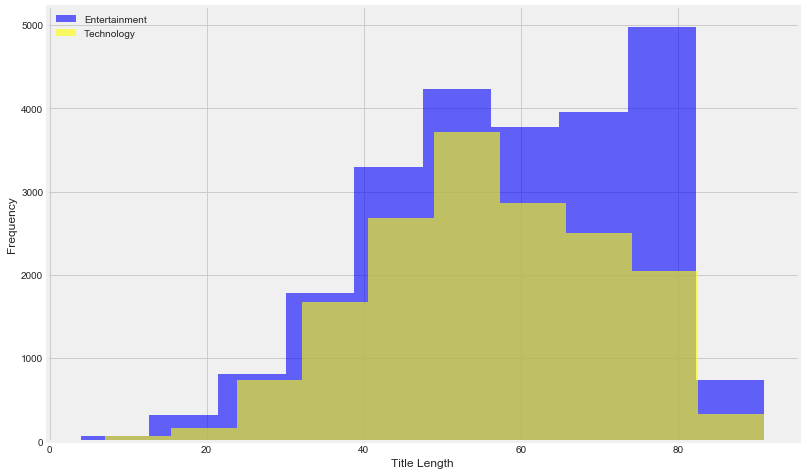

In [36]:
# check again histogram for title_len for category: Entertainment and category: Technology
plt.figure(figsize=(12, 8))

df[df['Category']=='Entertainment']['title_len'].plot(kind='hist', color='blue', 
                                       label='Entertainment', alpha=0.6)
df[df['Category']=='Technology']['title_len'].plot(kind='hist', color='yellow', 
                                       label='Technology', alpha=0.6)

plt.legend()
plt.xlabel("Title Length")

Okay, this is make sense

# Split Data

In [37]:
X = df['News Title']
y = df['Category']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [38]:
# total row x column for training and testing dataset
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(45826,)
(45826,)
(19640,)
(19640,)


# Vectorization

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_dtm = v.fit_transform(X_train)
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [40]:
X_test_dtm = v.transform(X_test)
X_test_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Modelling with Naive Bayes

In [41]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [42]:
print(X_train_dtm.shape)
print(X_test_dtm.shape)

(45826, 24103)
(19640, 24103)


In [43]:
y_pred = nb.predict(X_test_dtm)

In [44]:
# print the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test, y_pred))

[[4696  117   76  410]
 [ 100 6969   52  160]
 [ 120  104 1791   64]
 [ 381  145   54 4401]]


In [45]:
# print the classification report
print(metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     Business       0.89      0.89      0.89      5299
Entertainment       0.95      0.96      0.95      7281
      Medical       0.91      0.86      0.88      2079
   Technology       0.87      0.88      0.88      4981

     accuracy                           0.91     19640
    macro avg       0.90      0.90      0.90     19640
 weighted avg       0.91      0.91      0.91     19640



# Modelling with Logistic Regression

In [46]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [47]:
logreg.fit(X_train_dtm, y_train)

C:\Users\prase\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [48]:
y_pred_class = logreg.predict(X_test_dtm)

In [49]:
# print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[4781  136   56  326]
 [ 116 7060   30   75]
 [ 119   99 1812   49]
 [ 323  157   36 4465]]


In [50]:
# print the classification report
print(metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     Business       0.89      0.89      0.89      5299
Entertainment       0.95      0.96      0.95      7281
      Medical       0.91      0.86      0.88      2079
   Technology       0.87      0.88      0.88      4981

     accuracy                           0.91     19640
    macro avg       0.90      0.90      0.90     19640
 weighted avg       0.91      0.91      0.91     19640



# Modelling with Support Vector Machine (SVM)

In [51]:
# import an instantiate an svm model
from sklearn.svm import SVC
svm = SVC()

In [52]:
svm.fit(X_train_dtm, y_train)

SVC()

In [53]:
y_pred_class = svm.predict(X_test_dtm)

In [54]:
# print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[4774  154   39  332]
 [ 115 7088   24   54]
 [ 178  178 1680   43]
 [ 312  212   17 4440]]


In [55]:
# print the classification report
print(metrics.classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     Business       0.89      0.89      0.89      5299
Entertainment       0.95      0.96      0.95      7281
      Medical       0.91      0.86      0.88      2079
   Technology       0.87      0.88      0.88      4981

     accuracy                           0.91     19640
    macro avg       0.90      0.90      0.90     19640
 weighted avg       0.91      0.91      0.91     19640



# Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
# cross validation for Naive Bayes Model
nb_score = cross_val_score(nb, X_train_dtm, y_train, cv=5)
nb_score

array([0.90355662, 0.90594654, 0.90791053, 0.90801964, 0.90474632])

In [58]:
# cross validation for Logistic Regression Model
logreg_score = cross_val_score(logreg, X_train_dtm, y_train, cv=5)
logreg_score

C:\Users\prase\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\prase\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

array([0.91042985, 0.91729405, 0.91860338, 0.91707583, 0.91172941])

In [59]:
# cross validation for SVM Model
svm_score = cross_val_score(svm, X_train_dtm, y_train, cv=5)
svm_score

array([0.90399302, 0.90943808, 0.91314785, 0.90703764, 0.90812875])

In [60]:
print('Average Score for Naive Bayes:', np.average(nb_score))
print('Average Score for Logistic Regression:', np.average(logreg_score))
print('Average Score for SVM:', np.average(svm_score))

Average Score for Naive Bayes: 0.9060359289335015
Average Score for Logistic Regression: 0.9150265045313815
Average Score for SVM: 0.908349067255479


Based on the results above, the model we will choose is the logistic regression model because it has the highest score.

# Prediction Example

In [61]:
title = [
    'iPhone 12: Apple makes jump to 5G',
    'Ikea to buy back used furniture in recycling push'
]
title_dtm= v.transform(title)
logreg.predict(title_dtm)

array(['Technology', 'Business'], dtype=object)

"iPhone 12: Apple makes leap to 5G" is the Technology Category

"Ikea to buy back used furniture in a recycling push" is a Business Category

And it's all true. I take the title form BBC